# Cocrystalline Transformation in the Terahertz region

This project is an extension of a project I started in graduate school. There is no cleaning that needs to be done for the data as it is data I personally collected. Transformations from the raw signal were done in MatLab using a script that myself and other group members collaborated to write. 

The data shown here in this Jupyter notebook is the end of processing from a single beam spectra to absorbance in the low frequency IR range below 200 cm-1. This range can be used to view phonon vibrations of the crystalline lattice of solid crystalline materials. 

To start with the data processing, below is the libraries I know my data is stored with wavelength in the first column and the subsequent columns are the absorbances. The labels for the columns are the time data as the data was collected every 10 minutes.

## Getting started: import the libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('THz data.xlsx')

## Get the data ready to process

My data was collected back in 2018 during graduate school. I personally collected this data along side a visting scholar in my group. This was a large project that several professors at my college worked on. My portion was to collect the spectral data in the THz region and process it. Since I collected the data, I know there are no NaN or missing data in this data set. Cleaning will be more left to chopping off a section of noise in the data which was due to instrumental limitations not due to poor data collection. 

In [3]:
df.head(5)

,cm-1,10,20,30,40,50,60,70,80,90,...,21990,22000,22010,22020,22030,22040,22050,22060,22070,22080
0,5.050672,0.025375,0.027100,0.027856,0.027536,0.026821,0.027247,0.026674,0.027079,0.027195,...,0.036697,0.036467,0.036432,0.036640,0.036258,0.036153,0.036419,0.036655,0.036947,0.036618
1,5.252699,0.020498,0.022202,0.022954,0.022638,0.021905,0.022339,0.021753,0.022153,0.022263,...,0.030867,0.030644,0.030628,0.030835,0.030481,0.030385,0.030652,0.030902,0.031191,0.030860
2,5.454725,0.015510,0.017176,0.017923,0.017611,0.016864,0.017291,0.016710,0.017099,0.017203,...,0.024826,0.024610,0.024625,0.024830,0.024493,0.024412,0.024662,0.024946,0.025221,0.024897
3,5.656752,0.010759,0.012373,0.013116,0.012805,0.012050,0.012454,0.011895,0.012265,0.012367,...,0.018938,0.018729,0.018782,0.018986,0.018658,0.018596,0.018817,0.019147,0.019403,0.019091
4,5.858779,0.006591,0.008143,0.008882,0.008571,0.007811,0.008180,0.007654,0.008003,0.008103,...,0.013557,0.013355,0.013451,0.013656,0.013331,0.013290,0.013474,0.013857,0.014091,0.013796


In [4]:
freq = df['cm-1']

In [5]:
time = df.columns

In [6]:
absorb = df.drop(['cm-1'],axis =1)

Text(0, 0.5, 'Absorbance')

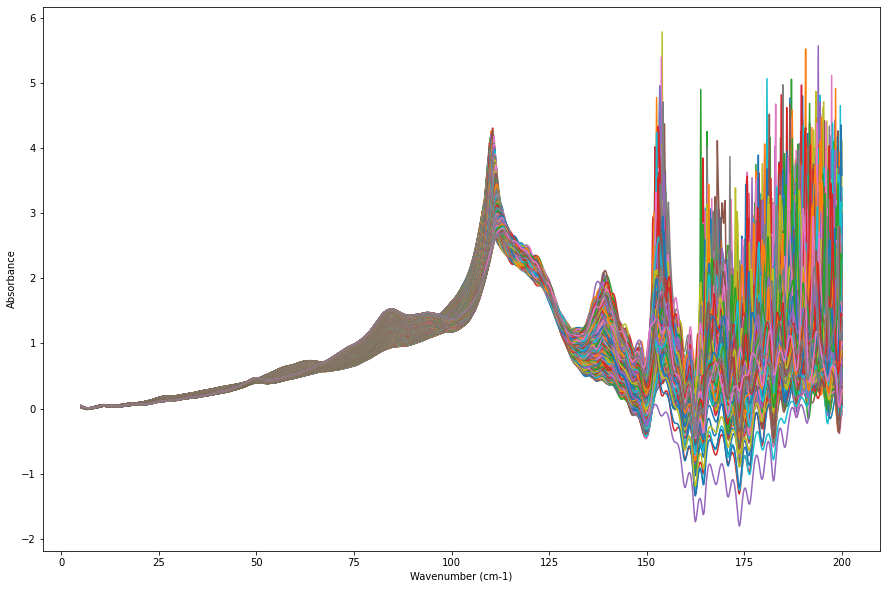

In [7]:
plt.figure(figsize=(15,10))
plt.plot(freq,absorb)
plt.xlabel('Wavenumber (cm-1)')
plt.ylabel('Absorbance')

This data has a lot of noise outside of 110cm-1 this is due to instrumental limitations not the data. I am going to truncate the data beyond 110 cm-1. 110.5 cm-1 is the cutoff I am going to use. That happens to be row 523

In [8]:
freq = freq[:523]

In [9]:
absorb = absorb[:523]

Text(0, 0.5, 'Absorbance')

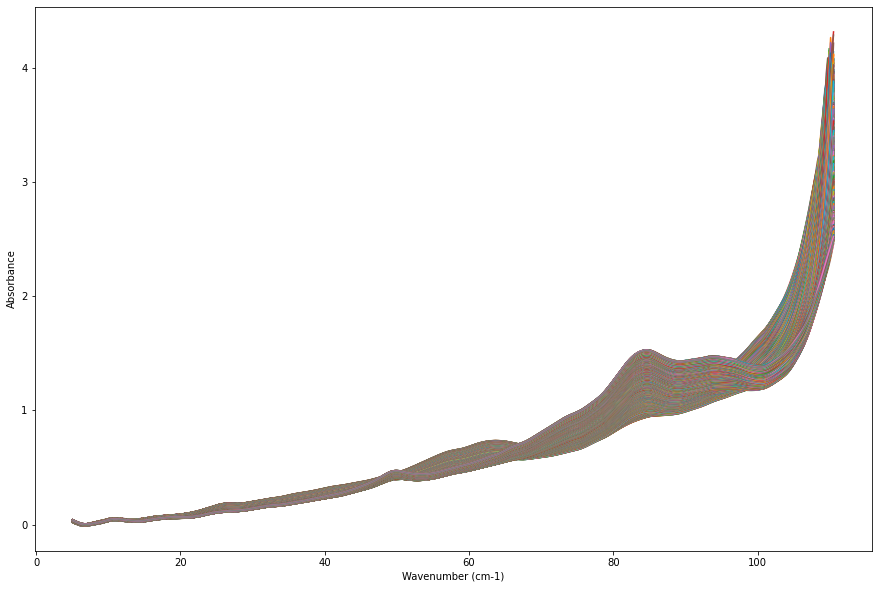

In [10]:
plt.figure(figsize=(15,10))
plt.plot(freq,absorb)
plt.xlabel('Wavenumber (cm-1)')
plt.ylabel('Absorbance')

That cleaned up the data quite a bit. Now the interesting part about this data is that this is a solid state transformation over the perios of several days. This crystalline solid was in fact a cocrystal but for the sake of explanation we can think of it as any other crystalline compound. A great example of a solid changing with time is chocolate. There are several crystalline forms of chocolate. One is the glossy chocolate we all know very well, where another form of chocolate is powdery. If you open an old candy bar you would have seen that chalky appearance. That is a crystalline transformation that the chocolate made. Both of those crystalline forms move in space differently from one another, because their molecules are packed differently. This affects the physical properties of the chocolate including how it melts, tastes, and feels. Just like chocolate, the compound I was testing in graduate school also went through a transformation like this. The absorbances in this range of light are effected by the packing of the crystals. 

Around 30, 50, 60, 80, and 90 cm-1 there are several peaks that you can see change with time as each spectrum is associated with time. Some of these peaks increase with time while others decrease with time. Previously I found this data difficult to manage as I was havign issues with modeling in a basic sense. Absorbance is defined by Beer's Law which states that absorbance is defined by A=ebc. As this law is addive meaning 

Text(0.5, 1.0, 'Ending Material (t=22080)')

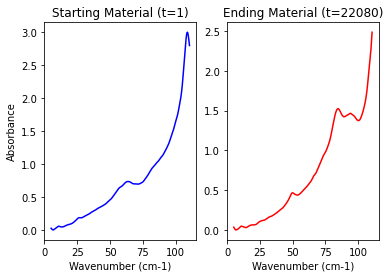

In [24]:
plt.subplot(1, 2, 1)
plt.plot(freq, absorb[10],'blue')
plt.title('Starting Material (t=1)')
plt.ylabel('Absorbance')
plt.xlabel('Wavenumber (cm-1)')


plt.subplot(1, 2, 2)
plt.plot(freq, absorb[time[-1]], 'r')
plt.xlabel('Wavenumber (cm-1)')
plt.title('Ending Material (t=22080)')

I'm honestly not sure what the best way to model the data would be. 

153.33333333333334